# NZ Seismic Stations and Clusters Map

A project of QuaSaR (Quake Safe Rings)

The overall __gaol__ is to examine how the GeoNet seismic network can be augmented with a low-cost network to offer low-latency EEWs by making use of newage earthquake picking algorithms and machine learning techniques. The expected outcome is for the findings to serve as evidence for supporting a strategic deployment of micro-array networks. Moreover, it may serve as inputs for hazard risk assessment and for anyone to use it as a basis for determining whether or not they need to invest in building a micro-array network.

### Objectives
1. Understand the network dynamics (structure of connection of the units and their capabilities)
   1. Retrieve all __operational__ NZ station inventory data and map them by types and location.
   1. Generate a __nearest neigbour map__ for clustering all the operational stations within a 30Km radius
   1. Apply earthquake __picking algorithms__ on the GeoNet data
1. Determine ways for improving the station network for EEW capabilities
   1. Propose to __fit additional stations__ to improve the 30Km nearest neighbour cluster
   1. Apply the geodetic methodology to __interpolate seismic data__ for the proposed station locations 
   1. Try the earthquake __picking algorithms__ on the hypothetical network to measure effectiveness

### DEFINE data services and software modules

International Federation Data of Seismic Networks (FDSN) is a global standard and a [data service](http://www.fdsn.org/services/). Therefore, acquiring the data in FSDN also allows reusing available ObsPy libraries. Inherit the classes
1. ObsPy
   1. FSDN as Client data sources
   1. core to read data and utilize datatime features
1. FDSN station service
   1. retrieve station metadata information in a FDSN StationXML format or text format for all the channels in CECS station with no time limitations: https://service.geonet.org.nz/fdsnws/station/1/query?network=NZ&station=CECS&level=channel&format=text
   

In [3]:
import glob
from obspy import read_inventory
from obspy.clients.fdsn import Client
from obspy.core import read, UTCDateTime
#from datetime import date

# Establish start and end time for retrieving waveform data
t_start = UTCDateTime.now()-518400 #6 days ago = 60s x 60m x 24h x 6d
t_end = UTCDateTime.now()+86400 #1 day in the future = 60s x 60m x 24h
print('Station startime: ', t_start, '\n & ending time: ', t_end)

try:
    #use either or GeoNet station service webservice URL or Obspy FDSN Client protocol to retrieve station data
    st_ws = 'https://service.geonet.org.nz/fdsnws/station/1/query?network=NZ&level=station&endafter=2020-12-31&format=xml'
    #st_ws = 'https://service.geonet.org.nz/fdsnws/station/1/query?network=NZ&station=CECS&level=channel'
    # Set FDSN client URL to arc_client
    client  = Client('GEONET')
    print("Client is",client)
except Exception as err:
    print("Error message:", err)


Station startime:  2020-10-09T06:28:21.224789Z 
 & ending time:  2020-10-16T06:28:21.224875Z
Client is FDSN Webservice Client (base url: http://service.geonet.org.nz)
Available Services: 'dataselect' (v1.1), 'event' (v1.1), 'station' (v1.1), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


### Get all Station details

GeoNet Location codes reserved for the seismic sensors are:
* 1? - weak motion sensors
* 2? - strong motion sensors

Channel codes 
- First letter of the code represents a combination of sampling rate and sensor bandwidth
* U (Ultra Long Period sampled at 0.01Hz, or SOH sampled at 0.01Hz)
* V (Very Long Period sampled at 0.1Hz, or SOH sampled at 0.1Hz)
* L (Broad band sampled at 1Hz, or SOH sampled at 1Hz)
* B (Broad band sampled at between 10 and 80 Hz, usually 10 or 50 Hz)
* S (Short-period sampled at between 10 and 80 Hz, usually 50 Hz)
* H (High Broad band sampled at or above 80Hz, generally 100 or 200 Hz)
* E (Extremely Short-period sampled at or above 80Hz, generally 100 Hz)

- The second letter represents the sensor type, e.g.(listed are the ones relevant to seismometers
* H (Weak motion sensor, e.g. measuring velocity)
* N (Strong motion sensor, e.g. measuring acceleration)
* L (Low gain sensor, usually velocity)
* M (Mass position, used for monitoring broadband sensors)

In [4]:
try:
    #st_inv = read_inventory(st_ws)
    st_inv = client.get_stations(network='NZ', location="1?,2?", station='*', channel='U*,V*,L*,B*,S*,H*,E*', 
                                 level='station', starttime=t_start, endtime = t_end)
    #Print the station inventory
    i = 0
    print(len(st_inv[0].stations))
    for i in range(len(st_inv[0].stations)):
        #print('Code:',st_inv[0][i].code,'Latitude:',st_inv[0][i].latitude,'Longitude:',st_inv[0][i].longitude,'Elavation:',st_inv[0][i].elevation)
        print(st_inv[0][i])

    #Plot network
    net.plot(projection="local", resolution="h", continent_fill_color='0.9', water_fill_color='1.0', 
                   marker='*', size=75, label=True, color='#b15928', time=None, show=True, outfile=None, 
                   method=None, fig=None)

except Exception as err:
    print("Error message:", err)


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


453
Station ABAZ (Army Bay)
	Station Code: ABAZ
	Channel Count: 3/9 (Selected/Total)
	2008-10-13T00:00:00.000000Z - 
	Access: open 
	Latitude: -36.60, Longitude: 174.83, Elevation: 74.0 m
	Available Channels:

Station ADCS (Ashburton District Council)
	Station Code: ADCS
	Channel Count: 3/9 (Selected/Total)
	2002-06-26T00:00:00.000000Z - 
	Access: open 
	Latitude: -43.90, Longitude: 171.75, Elevation: 111.0 m
	Available Channels:

Station AKCZ (Akaroa Harbour)
	Station Code: AKCZ
	Channel Count: 3/3 (Selected/Total)
	2012-03-01T00:00:00.000000Z - 
	Access: open 
	Latitude: -43.87, Longitude: 172.91, Elevation: 374.2 m
	Available Channels:

Station AKSS (Akaroa School)
	Station Code: AKSS
	Channel Count: 3/18 (Selected/Total)
	2011-08-25T00:00:00.000000Z - 
	Access: open 
	Latitude: -43.81, Longitude: 172.96, Elevation: 13.0 m
	Available Channels:

Station ALRZ (Allen Road)
	Station Code: ALRZ
	Channel Count: 3/6 (Selected/Total)
	2007-11-07T00:00:00.000000Z - 
	Access: open 
	Latitude:

### Stataion Array

Prepare an array of station data comprising
* code - as a unique identifier
* coordinates longitude & latitude
* elevation

In [5]:
st_coord = []

try:
    print(len(st_inv[0].stations))
    i = 0
    for i in range(len(st_inv[0].stations)):
        st_tuple = (st_inv[0][i].code, st_inv[0][i].latitude,st_inv[0][i].longitude, st_inv[0][i].elevation)
        st_coord.append(tuple(st_tuple))
        #st_coord = {'Code': st_inv[0][i].code,'Coordinates': {'Latitude': st_inv[0][i].latitude,'Longitude': st_inv[0][i].longitude},'Elavation': st_inv[0][i].elevation}
        print(st_coord[i])
        
except Exception as err:
    print("Error message:", err)


453
('ABAZ', -36.600224003, 174.832332909, 74.0)
('ADCS', -43.9024444, 171.74756295, 111.0)
('AKCZ', -43.8721, 172.90983, 374.2)
('AKSS', -43.81091, 172.96349, 13.0)
('ALRZ', -38.562043299, 176.343014052, 405.0)
('AMBC', -43.154677722, 172.730879511, 41.0)
('AMCZ', -43.17654, 172.65146, 179.0)
('ANWZ', -40.459742927, 176.475058802, 132.0)
('APPS', -42.948949444, 171.567735496, 743.0)
('APZ', -46.83180552, 167.988825498, 601.0)
('ARAZ', -38.62769, 176.12006, 420.0)
('ARCZ', -43.94705, 171.17674, 462.0)
('ARHZ', -39.2631, 176.9959, 270.0)
('ARKS', -41.242077028, 174.944096424, 96.0)
('ARPS', -42.523958469, 171.407865584, 85.0)
('ASHS', -43.274410412, 172.595947177, 47.0)
('AWAZ', -37.06378, 174.64292, 103.0)
('BDCS', -46.249063655, 169.719372684, 55.0)
('BFZ', -40.679647283, 176.246245098, 283.0)
('BHHZ', -39.489284, 176.0629288, 831.0)
('BHW', -41.408230683, 174.871114813, 101.0)
('BKZ', -39.165665643, 176.492543736, 706.0)
('BMTS', -41.191372, 174.92603, 84.0)
('BOWS', -41.279193, 174.

### Cluster Stations

Apply DBSCAN to cluster stations with an epsilon < 30Km

#### Data clensing

In [6]:
import numpy as np

tmp_arr = np.array(st_coord)
tmp_noelev_arr = np.delete(tmp_arr,3,1)
tmp_nolabel_arr = np.delete(tmp_noelev_arr,0,1).astype(np.float)
print('number of stations:',len(tmp_nolabel_arr))
print('Station coordinates:\n',tmp_nolabel_arr)

number of stations: 453
Station coordinates:
 [[ -36.600224    174.83233291]
 [ -43.9024444   171.74756295]
 [ -43.8721      172.90983   ]
 [ -43.81091     172.96349   ]
 [ -38.5620433   176.34301405]
 [ -43.15467772  172.73087951]
 [ -43.17654     172.65146   ]
 [ -40.45974293  176.4750588 ]
 [ -42.94894944  171.5677355 ]
 [ -46.83180552  167.9888255 ]
 [ -38.62769     176.12006   ]
 [ -43.94705     171.17674   ]
 [ -39.2631      176.9959    ]
 [ -41.24207703  174.94409642]
 [ -42.52395847  171.40786558]
 [ -43.27441041  172.59594718]
 [ -37.06378     174.64292   ]
 [ -46.24906366  169.71937268]
 [ -40.67964728  176.2462451 ]
 [ -39.489284    176.0629288 ]
 [ -41.40823068  174.87111481]
 [ -39.16566564  176.49254374]
 [ -41.191372    174.92603   ]
 [ -41.279193    174.776323  ]
 [ -41.71491545  173.87574085]
 [ -41.38923599  173.12851282]
 [ -43.480415    172.6821837 ]
 [ -41.43954404  173.90511789]
 [ -43.48317558  172.53001529]
 [ -41.10719423  175.06643852]
 [ -43.52934701  172.619

#### Cluster
1. Apply DBSCAN
1. Compute the cluster measure to estimate the accuracy
1. Dump the output to a file including cluster label, lat/lon, station code, and so on

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X, labels_true = make_blobs(n_samples=len(tmp_nolabel_arr), centers=tmp_nolabel_arr, cluster_std=0.4,random_state=0)
db = DBSCAN(eps=30.0/6371.0, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(X))

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print(f"Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 21
Estimated number of noise points: 76
Homogeneity: 0.337
Completeness: 1.000
V-measure: 0.504
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: -0.049


#### Plot results
1. plot clusters with varied colors unique to each cluster
1. plot fault lines to show closes sensor in cluster to the fault line

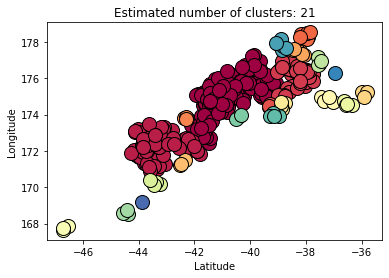

In [8]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    #uncomment to plot the noise
    #xy = X[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Resources
1. [Global data services and standards](http://www.fdsn.org/services/) offered by the International Federation Data of Seismic Networks (FDSN). 
1. GEONET [Stream Naming Conventions](https://www.geonet.org.nz/data/supplementary/channels) are based on historical usage together with recommendations from the [SEED manual](https://www.fdsn.org/seed_manual/SEEDManual_V2.4.pdf)
1. [Seismo-Live](https://krischer.github.io/seismo_live_build/html/Workshops/2017_Baku_STCU_IRIS_ObsPy_course/07_Basic_Processing_Exercise_solution_wrapper.html) examples of get station waveform, inventory, event, arrival time, response, and plotting using obspy
1. Choosing [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) over K-means [clustering to reduce spatial data sizes](https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/) - k-means is not an ideal algorithm for latitude-longitude spatial data because it minimizes variance, not geodetic distance
1. [Example of scikit-learn DBSCAN](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)
1. [obspy.geodetics](https://docs.obspy.org/packages/obspy.geodetics.html) - various geodetic utilities for ObsPy - try an alternative clustering method with obspy geodetics